In [1]:
import re
from TextCleaner import TextCleaner
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import nltk
from langdetect import detect
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import PorterStemmer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, SimpleRNN, SpatialDropout1D
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding

# Classifiers
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.naive_bayes import (
    BernoulliNB,
    ComplementNB,
    MultinomialNB,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
df = pd.read_csv('sentiment.csv')
df = df.drop(df.columns[0], axis=1)
df

,Author,Text,Time,Like Count,Currency ISO Code,Url,target
0,yusobays,@elonmusk @elonmusk please Come to TRY₺ #turk...,2021-01-31 22:21:58+00:00,1,TRY,https://twitter.com/yusobays/status/1356004827...,0.0
1,BtcTurkDestek,"@DrBatal Hello, if you have registered using ...",2021-01-30 18:07:15+00:00,0,TRY,https://twitter.com/BtcTurkDestek/status/13555...,0.0
2,RisingValhalla,“I trade weekly bars. You?”\n\n200 day moving ...,2021-01-30 03:29:59+00:00,0,TRY,https://twitter.com/RisingValhalla/status/1355...,0.0
3,Erda55203615,@elonmusk Try turkish lira its at the bottom m...,2021-01-29 20:20:49+00:00,0,TRY,https://twitter.com/Erda55203615/status/135524...,-1.0
4,Erda55203615,@ImTooRealForU TRY FUCKING TURKISH LIRA,2021-01-29 20:19:36+00:00,0,TRY,https://twitter.com/Erda55203615/status/135524...,-1.0
...,...,...,...,...,...,...,...
1944,flyingstocksman,For those of you who missed it last night with...,2021-01-01 09:24:17+00:00,0,GBP,https://twitter.com/flyingstocksman/status/134...,0.0
1945,alpeshbp,GBP/USD Weekly Price Forecast – The British Po...,2021-01-01 07:13:32+00:00,0,GBP,https://twitter.com/alpeshbp/status/1344904575...,0.0
1946,campsbay_com,"20.0142 ZAR for 1 GBP @ December 31, 2020 at 0...",2021-01-01 04:20:02+00:00,0,GBP,https://twitter.com/campsbay_com/status/134486...,0.0
1947,MajorFXNow,GBP/EUR: Pound Lifted by UK Approval of AstraZ...,2021-01-01 02:32:32+00:00,0,GBP,https://twitter.com/MajorFXNow/status/13448338...,0.0


In [3]:
def sentiments(df):
    if df['target'] >= 0:
        return 'Positive'
    elif df['target'] < 0:
        return 'Negative'      

In [4]:
def detect_lang(df):
    return detect(df['Text']) 

In [5]:
df['Sentiment'] = df.apply(sentiments, axis=1)
#df['Language'] = df.apply(detect_lang, axis=1)

In [6]:
#df = df[df['Language'] == 'en']
df

,Author,Text,Time,Like Count,Currency ISO Code,Url,target,Sentiment
0,yusobays,@elonmusk @elonmusk please Come to TRY₺ #turk...,2021-01-31 22:21:58+00:00,1,TRY,https://twitter.com/yusobays/status/1356004827...,0.0,Positive
1,BtcTurkDestek,"@DrBatal Hello, if you have registered using ...",2021-01-30 18:07:15+00:00,0,TRY,https://twitter.com/BtcTurkDestek/status/13555...,0.0,Positive
2,RisingValhalla,“I trade weekly bars. You?”\n\n200 day moving ...,2021-01-30 03:29:59+00:00,0,TRY,https://twitter.com/RisingValhalla/status/1355...,0.0,Positive
3,Erda55203615,@elonmusk Try turkish lira its at the bottom m...,2021-01-29 20:20:49+00:00,0,TRY,https://twitter.com/Erda55203615/status/135524...,-1.0,Negative
4,Erda55203615,@ImTooRealForU TRY FUCKING TURKISH LIRA,2021-01-29 20:19:36+00:00,0,TRY,https://twitter.com/Erda55203615/status/135524...,-1.0,Negative
...,...,...,...,...,...,...,...,...
1944,flyingstocksman,For those of you who missed it last night with...,2021-01-01 09:24:17+00:00,0,GBP,https://twitter.com/flyingstocksman/status/134...,0.0,Positive
1945,alpeshbp,GBP/USD Weekly Price Forecast – The British Po...,2021-01-01 07:13:32+00:00,0,GBP,https://twitter.com/alpeshbp/status/1344904575...,0.0,Positive
1946,campsbay_com,"20.0142 ZAR for 1 GBP @ December 31, 2020 at 0...",2021-01-01 04:20:02+00:00,0,GBP,https://twitter.com/campsbay_com/status/134486...,0.0,Positive
1947,MajorFXNow,GBP/EUR: Pound Lifted by UK Approval of AstraZ...,2021-01-01 02:32:32+00:00,0,GBP,https://twitter.com/MajorFXNow/status/13448338...,0.0,Positive


In [7]:
data_v1 = df[['Text','Sentiment']]
data_v1.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [8]:
'''for (rowNo, rowData) in df.iterrows():
    try:
        if rowNo == 1:
            data_v1.loc[rowNo, 'Text'] =  (df.loc[rowNo, 'Text'] + ' ') * df.loc[rowNo, 'Like Count']
    except Exception as e:                                                                          
        print("An error occurred : ", e)   '''

'for (rowNo, rowData) in df.iterrows():\n    try:\n        if rowNo == 1:\n            data_v1.loc[rowNo, \'Text\'] =  (df.loc[rowNo, \'Text\'] + \' \') * df.loc[rowNo, \'Like Count\']\n    except Exception as e:                                                                          \n        print("An error occurred : ", e)   '

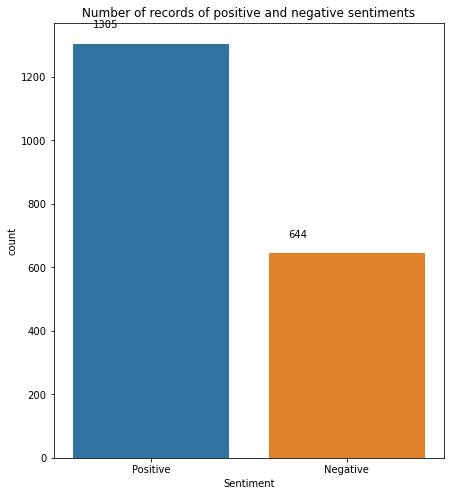

In [9]:
plt.figure(figsize=(7,8))
plt.title("Number of records of positive and negative sentiments")
plot = sn.countplot(x = 'Sentiment', data = data_v1)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + 0.1 ,p.get_height()+50))

In [10]:
clean = TextCleaner()
text = clean.convert_emoji_to_text("Hilarious 😂. The feeling of making a sale 😎, The feeling of actually fulfilling orders 😒")
print(text)

text4 = "Hello :-) :-)"
resp = clean.convert_emoticons(text4)
print(resp)

Hilarious face with tears of joy. The feeling of making a sale smiling face with sunglasses, The feeling of actually fulfilling orders unamused face
Hello Happy face smiley Happy face smiley


In [11]:
df

,Author,Text,Time,Like Count,Currency ISO Code,Url,target,Sentiment
0,yusobays,@elonmusk @elonmusk please Come to TRY₺ #turk...,2021-01-31 22:21:58+00:00,1,TRY,https://twitter.com/yusobays/status/1356004827...,0.0,Positive
1,BtcTurkDestek,"@DrBatal Hello, if you have registered using ...",2021-01-30 18:07:15+00:00,0,TRY,https://twitter.com/BtcTurkDestek/status/13555...,0.0,Positive
2,RisingValhalla,“I trade weekly bars. You?”\n\n200 day moving ...,2021-01-30 03:29:59+00:00,0,TRY,https://twitter.com/RisingValhalla/status/1355...,0.0,Positive
3,Erda55203615,@elonmusk Try turkish lira its at the bottom m...,2021-01-29 20:20:49+00:00,0,TRY,https://twitter.com/Erda55203615/status/135524...,-1.0,Negative
4,Erda55203615,@ImTooRealForU TRY FUCKING TURKISH LIRA,2021-01-29 20:19:36+00:00,0,TRY,https://twitter.com/Erda55203615/status/135524...,-1.0,Negative
...,...,...,...,...,...,...,...,...
1944,flyingstocksman,For those of you who missed it last night with...,2021-01-01 09:24:17+00:00,0,GBP,https://twitter.com/flyingstocksman/status/134...,0.0,Positive
1945,alpeshbp,GBP/USD Weekly Price Forecast – The British Po...,2021-01-01 07:13:32+00:00,0,GBP,https://twitter.com/alpeshbp/status/1344904575...,0.0,Positive
1946,campsbay_com,"20.0142 ZAR for 1 GBP @ December 31, 2020 at 0...",2021-01-01 04:20:02+00:00,0,GBP,https://twitter.com/campsbay_com/status/134486...,0.0,Positive
1947,MajorFXNow,GBP/EUR: Pound Lifted by UK Approval of AstraZ...,2021-01-01 02:32:32+00:00,0,GBP,https://twitter.com/MajorFXNow/status/13448338...,0.0,Positive


In [12]:
clean = TextCleaner()

def cleaning(df_cl, stop_words):
    
    # Lowercase
    df_cl['Text'] = df_cl['Text'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
    
    # Remove Non -letters
    df_cl['Text'] = df_cl['Text'].apply(lambda x: re.sub(r"[^a-zA-Z0-9]", ' ', x))
    
    # Removing URLs
    df_cl["Text"] = df_cl["Text"].apply(lambda x: re.sub(r'http\S+', '', x))
    
    # Removing Punctuation
    df_cl["Text"] = df_cl["Text"].apply(lambda x: re.sub(r'[^\w\s]','', x))
    
    # Removing stop words
    df_cl['Text'] = df_cl['Text'].apply(lambda x:' '.join(x for x in x.split() if x not in stop_words))
    
    # Removing mentioned author names
    df_cl["Text"] = df_cl["Text"].apply(lambda x: re.sub("@[A-Za-z0-9]+","", x))

    # Lemmatization
    df_cl['Text'] = df_cl['Text'].apply(lambda x:' '.join([Word(x).lemmatize() for x in x.split()]))
    
    # Emoticons
    df_cl['Text'] = df_cl['Text'].apply(lambda x: clean.convert_emoji_to_text(x))
    
    # Emojis
    df_cl['Text'] = df_cl['Text'].apply(lambda x: clean.convert_emoji_to_text(x))    
    
    # Stemming
    #df_cl['Text'] = df_cl['Text'].apply(lambda x: port_stemmer(x))
    return df_cl

stop_words = stopwords.words('english')
data_v1 = cleaning(data_v1, stop_words)

In [13]:
data_v1

,Text,Sentiment
0,elonmusk elonmusk please come try turkishlira,Positive
1,drbatal hello registered using turkish citizen...,Positive
2,trade weekly bar 200 day moving average breach...,Positive
3,elonmusk try turkish lira bottom maybe would go,Negative
4,imtoorealforu try fucking turkish lira,Negative
...,...,...
1944,missed last night nye potentially important tw...,Positive
1945,gbp usd weekly price forecast british pound lo...,Positive
1946,20 0142 zar 1 gbp december 31 2020 06 20am sa ...,Positive
1947,gbp eur pound lifted uk approval astrazeneca v...,Positive


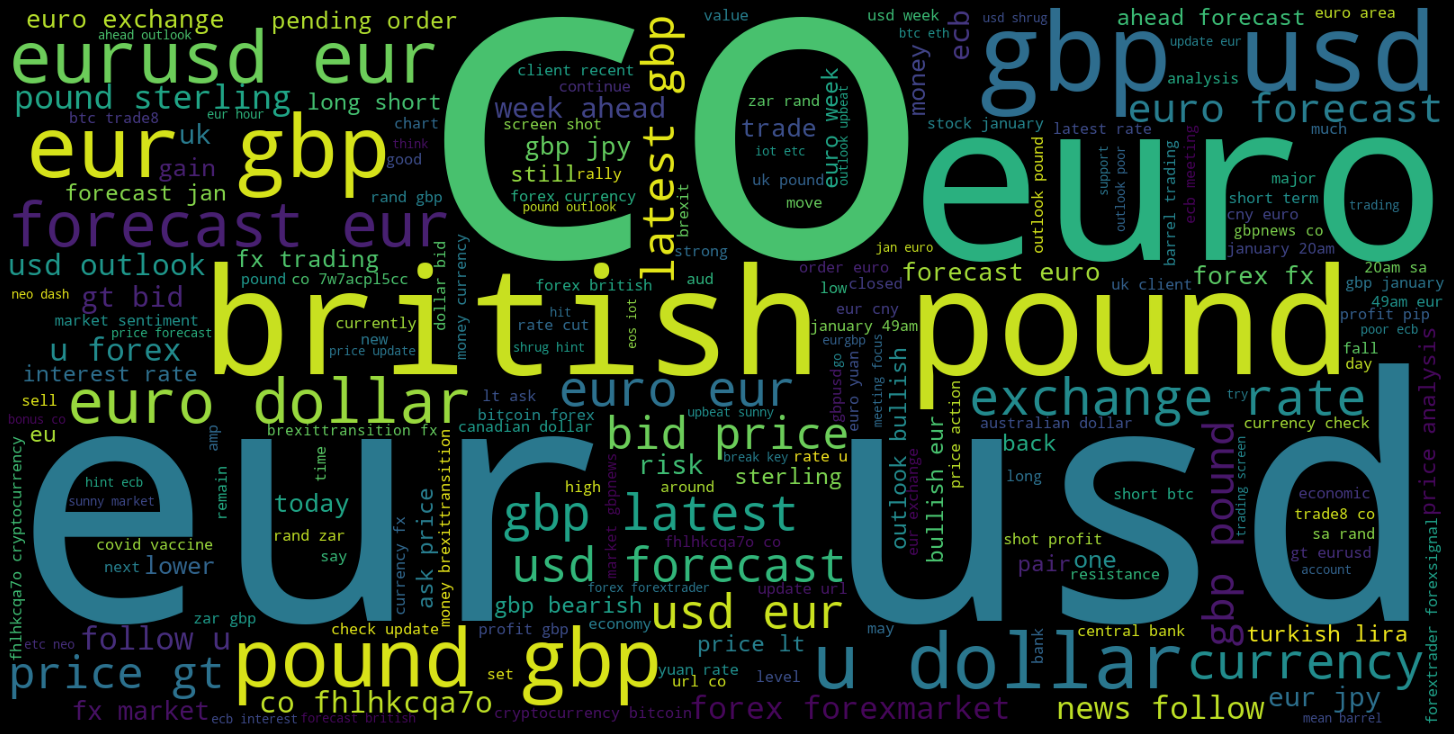

In [14]:
common_words = ''
for i in data_v1.Text:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = WordCloud(width=1600, height=800).generate(common_words)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [15]:
lb = LabelEncoder()
data_v1['Sentiment'] = lb.fit_transform(data_v1['Sentiment'])

In [16]:
tokenizer = Tokenizer(num_words=500, split=' ', lower=True) 
tokenizer.fit_on_texts(data_v1['Text'].values)
X = tokenizer.texts_to_sequences(df['Text'].values)
X = pad_sequences(X)

In [17]:
y = pd.get_dummies(data_v1['Sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#dataset = np.array(df['target'])
#dataset = dataset.reshape(-1,1)
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

<h3>Defining Models</h3>

In [19]:
models = [ 'SimpleRNN', 'LSTM', 'GRU']

In [20]:
from keras.metrics import Precision, Recall
def build_model(nb_words, _model="SimpleRNN", embedding_matrix=None):
    model = Sequential()
    model.add(Embedding(input_dim=1000, output_dim=64, input_length = nb_words))
    if _model == "SimpleRNN":
        model.add(SimpleRNN(128))
    elif _model == "LSTM":
        model.add(LSTM(100, return_sequences=True))
        model.add(LSTM(128))
        #model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2, activation='relu'))
    elif _model == "GRU":
        model.add(GRU(500))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'mse', 'mae', 'mape'])
    return model

In [21]:
X.shape[1]

34

In [22]:
batch_size = 64
for model_ in models:
    print("Model : ", model_)
    model_ = build_model(X.shape[1], model_, None)
    print("Model Summary")
    print(model_.summary())
    model_.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size=batch_size, verbose = 'auto', validation_data=(X_test,y_test))
    #predictions = model_.predict(X_test)
    #print(classification_report(y_test, predictions))
   
    y_pred = model_.predict(X_test)

    '''y_test = scaler.inverse_transform(y_test)
    y_pred = scaler.inverse_transform(y_pred)
    print(mean_squared_error(y_test,y_pred))
    print(classification_report(y_test, y_pred))'''

    model_.evaluate(X_test, y_test)
    print("")
    print("")
    print("")

Model :  SimpleRNN
Model Summary
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 64)            64000     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               24704     
_________________________________________________________________
dense (Dense)                (None, 2)                 258       
Total params: 88,962
Trainable params: 88,962
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
13/13 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.6462 - mse: 0.2269 - mae: 0.3793 - mape: 189667344.0000



Model :  LSTM
Model Summary
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output S

In [23]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
#plot_training_hist(history)

In [24]:
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()
def stemmed_words(doc):
    stemmed_words = [stemmer.stem(w) for w in analyzer(doc)]
    non_stop_words = [word for word in stemmed_words]
    return non_stop_words

In [25]:
count_vectorizer = CountVectorizer(stop_words= stop_words, max_features= 1000)
feature_vector = count_vectorizer.fit(data_v1['Text'])
train_ds_features = count_vectorizer.transform(data_v1['Text'])
features = feature_vector.get_feature_names()
features_counts = np.sum(train_ds_features.toarray(), axis = 0)
features_counts = pd.DataFrame(dict(features =  features, counts = features_counts))
features_counts.sort_values("counts", ascending= False)[0:15]
features_counts

,features,counts
0,00,13
1,000,13
2,01,25
3,03,5
4,05,5
...,...,...
995,yuan,35
996,zar,67
997,zealand,16
998,zew,7


In [26]:
train_x, test_x, train_y, test_y =  train_test_split(train_ds_features, data_v1['Sentiment'], test_size = 0.3, random_state = 42)

In [27]:
classifiers = {
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
    "MultinomialNB": MultinomialNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "AdaBoostClassifier": AdaBoostClassifier(),
}

In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

for name, sklearn_classifier in classifiers.items():
    print("Classifier : ", name)
    sklearn_classifier.fit(train_x.toarray(), train_y)
    test_ds_predicted = sklearn_classifier.predict(test_x.toarray())
    print(metrics.classification_report(test_y,test_ds_predicted))
    print("------------------------------------------------------")
    '''print('MAE: %f' % mean_absolute_error(test_y, test_ds_predicted))
    print('MSE: %f' % mean_squared_error(test_y, test_ds_predicted))
    print('RMSE: %f' % sqrt(mean_squared_error(test_y, test_ds_predicted)))
    print('MAPE: %f' % MAPE(test_y, test_ds_predicted))'''
    print("")
    print("")

Classifier :  BernoulliNB
              precision    recall  f1-score   support

           0       0.54      0.59      0.56       191
           1       0.79      0.76      0.78       394

    accuracy                           0.70       585
   macro avg       0.67      0.67      0.67       585
weighted avg       0.71      0.70      0.71       585

------------------------------------------------------


Classifier :  ComplementNB
              precision    recall  f1-score   support

           0       0.51      0.63      0.57       191
           1       0.80      0.71      0.75       394

    accuracy                           0.68       585
   macro avg       0.66      0.67      0.66       585
weighted avg       0.71      0.68      0.69       585

------------------------------------------------------


Classifier :  MultinomialNB
              precision    recall  f1-score   support

           0       0.53      0.53      0.53       191
           1       0.77      0.78      0.7

In [29]:
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100